<a href="https://colab.research.google.com/github/2la23la/-Image-Classification-using-VGG-16-CNN-Model/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 6.7 MB/s 


In [ ]:
!pip install tensorflow
!pip install tensorboard
!pip install tflearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras, os
from keras.models import Sequential                        # This gets our neuralnetwork as Sequential network as we know it can be sequential layers or graph.
from tensorflow.keras.layers import Conv2D                 # We are working with images. All the images are basically 2D.
from tensorflow.keras.layers import MaxPooling2D           # We choose max pooling.
from tensorflow.keras.layers import Flatten                # The process of converting all the resultant 2D arrays into a single long continous linear vector.
from tensorflow.keras.layers import Dense                  # The last step! The full connection of the neural network is performed with this Dense.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import cv2
import numpy as np
import pandas as pd
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from sklearn.model_selection import train_test_split
from random import shuffle
from tqdm import tqdm
import numpy as np
import pandas as pd
import cv2
import tflearn
from tflearn.layers.estimator import regression
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Colab Notebooks/Train'
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/Test'
IMG_SIZE = 224
LR = 0.00001
MODEL_NAME = 'Sport-classification-cnn'
def create_label(image_name):
    word_label = image_name[0]
    #print(word_label)
    if word_label == 'B':
        return np.array([1,0,0,0,0,0])
    elif word_label == 'F':
        return np.array([0,1,0,0,0,0])
    elif word_label == 'R':
        return np.array([0,0,1,0,0,0])
    elif word_label == 'S':
        return np.array([0,0,0,1,0,0])
    elif word_label == 'T':
        return np.array([0,0,0,0,1,0])
    elif word_label == 'Y':
        return np.array([0,0,0,0,0,1])

def create_train_data():
    training_data = []
    #print(os.listdir(TRAIN_DIR))
    for img in tqdm(os.listdir(TRAIN_DIR)[:]):
        path = os.path.join(TRAIN_DIR, img)
        #print(path)
        img_data = cv2.imread(path,0)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img_data), create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return np.array(training_data)

def t_data():
    rows=[]
    names=[]
    for img in tqdm(os.listdir(TEST_DIR)[:]):
        names.append(img)
        path = os.path.join(TEST_DIR, img)
        img_data = cv2.imread(path, 0)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        img_data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
        prediction = vgg16_model.predict(test_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1))[0]
        max_value = max(prediction[:].tolist())
        #print(max_value)
        index = prediction[:].tolist().index(max_value)
        rows.append(index)
    dict={"image_name":names,"label":rows}
    df = pd.DataFrame(dict) 
    
    # saving the dataframe 
    df.to_csv('final.csv',index=False) 


In [ ]:
if (os.path.exists('train_data.npy')): # If you have already created the dataset:
    train_data =np.load('train_data.npy',allow_pickle=True)
    
else:
    train_data = create_train_data()
    
train = train_data

strat=np.array([i for i in train[:,1]])
X_train, X_test, y_train, y_test = train_test_split( train[:,0], train[:,1], test_size=0.2, random_state=42,stratify=strat)
X_train = np.array([i for i in X_train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test=np.array([i for i in X_test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array([i for i in y_train]).reshape(X_train.shape[0],6)
y_test = np.array([i for i in y_test]).reshape(X_test.shape[0],6)

100%|██████████| 1681/1681 [00:31<00:00, 53.08it/s] 
/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
<ipython-input-8-e4e52187e820>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(training_data)


In [ ]:
#Defining input image shape
_input = Input((IMG_SIZE, IMG_SIZE,1)) 

#Building VGG-16 Model
conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
#fully connected layers
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(6, activation="softmax")(dense2)


In [ ]:

vgg16_model  = Model(inputs=_input, outputs=output)

from keras.optimizers import Adam
opt = Adam(lr=0.001)
vgg16_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

if (os.path.exists('model.tfl.meta')):
    vgg16_model.load('./model.tfl')
else:
    vgg16_model.fit( X_train,  y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32)
    vgg16_model.save('model.tfl')


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                           

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1344/1344 [==============================] - 34s 25ms/sample - loss: 26.1848 - acc: 0.2597 - val_loss: 1.6670 - val_acc: 0.2730
Epoch 2/100
1344/1344 [==============================] - 19s 14ms/sample - loss: 1.6817 - acc: 0.3065 - val_loss: 1.5203 - val_acc: 0.3561
Epoch 3/100
1344/1344 [==============================] - 19s 14ms/sample - loss: 1.5515 - acc: 0.3921 - val_loss: 1.3788 - val_acc: 0.4748
Epoch 4/100
1344/1344 [==============================] - 19s 14ms/sample - loss: 1.4391 - acc: 0.4241 - val_loss: 1.3372 - val_acc: 0.5074
Epoch 5/100
1344/1344 [==============================] - 19s 14ms/sample - loss: 1.3890 - acc: 0.4591 - val_loss: 1.2606 - val_acc: 0.5223
Epoch 6/100
1344/1344 [==============================] - 19s 14ms/sample - loss: 1.2663 - acc: 0.5223 - val_loss: 1.2620 - val_acc: 0.5134
Epoch 7/100
1344/1344 [==============================] - 19s 14ms/sample - loss: 1.1375 - acc: 0.5655 - val_loss: 1.1296 - val_acc: 0.6083
Epoch 8/100
1344/1344 [===============

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


B: 1.7463655240135267e-05, F: 0.9921302199363708,R: 1.0647139561115182e-06, S: 0.007682942319661379,T: 9.675257751950994e-05, Y: 7.155708590289578e-05


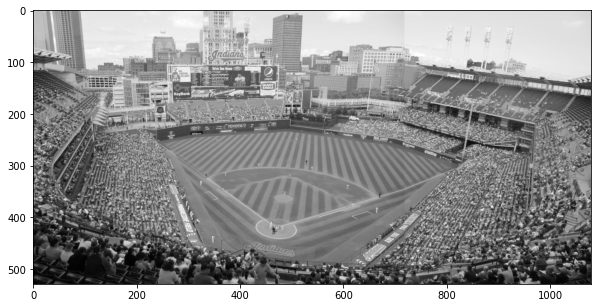

100%|██████████| 688/688 [00:18<00:00, 36.33it/s]


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Test/3.jpg',0)
test_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
test_img = test_img.reshape(IMG_SIZE, IMG_SIZE, 1)
prediction = vgg16_model.predict(test_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1))[0]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')
print(f"B: {prediction[0]}, F: {prediction[1]},R: {prediction[2]}, S: {prediction[3]},T: {prediction[4]}, Y: {prediction[5]}")
plt.show()
t_data()
